In [1]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.neighbors.kde import KernelDensity

In [2]:
mat = pd.read_csv("data", header=None)
mat.values

array([[32.0571 , 34.76771],
       [32.05709, 34.76772],
       [32.05709, 34.76771],
       ...,
       [32.12723, 34.83545],
       [32.09812, 34.79781],
       [32.0849 , 34.79665]])

In [3]:
import math
kde = KernelDensity(kernel='exponential', bandwidth=0.2).fit(mat.values)
score = kde.score([[32.09,34.78]])
print(math.exp(score))

3.4612293061733745


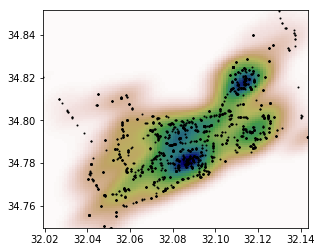

In [4]:
m1 = mat.iloc[:,0]
m2 = mat.iloc[:,1]
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [5]:
p = kernel.evaluate([[32.09,34.78]])
print(p)

[534.92241753]
